# Import Required Packages

In [386]:
# Imports
import os
import datetime
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd



# Input data from User

In [387]:
#Market analysed: 'Investment','FullYear','DayAhead','Balancing' (choose one or several)
market_analysed=['Balancing'] 
output='CurtailmentHourly'
first_timestep="2012-01-02"
#Number of timesteps 
number_periods=8736*12 
#size of each time step
size_timestep="300s"



# Plot Settings

In [388]:
# Set plotting specifications
% matplotlib inline
plt.rcParams.update({'font.size': 21})
plt.rcParams['xtick.major.pad']='12'
plt.rc('legend', fontsize=16)
y_limit = 1.1
lw = 3

# Read Input Files

In [389]:
for market in market_analysed:
    csvfiles = []
    for file in glob.glob("./input/results/" + market + "/*.csv"):
        csvfiles.append(file)

    csvfiles=[file.replace('./input\\','') for file in csvfiles] 
    csvfiles=[file.replace('.csv','') for file in csvfiles]  
    csvfiles=[file.split('_') for file in csvfiles]  
    csvfiles = np.asarray(csvfiles)  
    csvfiles=pd.DataFrame.from_records(csvfiles)
    
    csvfiles.rename(columns={0: 'Output', 1: 'Scenario',2: 'Year',3:'Subset'}, inplace=True)
    scenarios=csvfiles.Scenario.unique().tolist()
    years=csvfiles.Year.unique().tolist()
    subsets=csvfiles.Subset.unique().tolist()

    data=pd.DataFrame()
    for scenario in scenarios:
        for year in years:
            for subset in subsets:
                file = "./input/results/"+ market + "/"+ output + "_" + scenario + "_" + year + "_" + subset + ".csv"
                if os.path.isfile(file):
                   df=pd.read_csv(file,encoding='utf8')
                   df['Scenario'] =scenario
                   df['Market']  =market
                   data=data.append(df) 

                
                

In [390]:
#Converting timesteps of different markets
#To be done



In [391]:
#Full timesteps
full_timesteps = pd.read_csv('./input/full_timesteps.csv')
full_timesteps['timestamp']= pd.date_range(first_timestep, periods = number_periods, freq =size_timestep)

In [392]:
#Merging dataframes
data=pd.merge(full_timesteps,data, on=['SSS','TTT'],how='left')

In [393]:
data

,SSS,TTT,timestamp,Y,C,RRR,AAA,G,FFF,COMMODITY,TECH_TYPE,UNITS,Val,Scenario,Market
0,S0001,T01,2012-01-02 00:00:00,2030.0,NORWAY,NSY_OFF_2_Hub_NO_c,NSY_OFF_2_Hub_NO_c_2030,Wind-Offshore-10_19,WIND,ELECTRICITY,WIND-OFF,MWh,1304.637953,OffshoreGrid,Balancing
1,S0001,T01,2012-01-02 00:00:00,2030.0,NORWAY,NSY_OFF_2_Hub_NO_w,NSY_OFF_2_Hub_NO_w_2030,Wind-Offshore-10_19,WIND,ELECTRICITY,WIND-OFF,MWh,1899.999200,OffshoreGrid,Balancing
2,S0001,T01,2012-01-02 00:00:00,2050.0,BELGIUM,BE_R,BE2_OFF_type_2,Wind-Offshore-10_19,WIND,ELECTRICITY,WIND-OFF,MWh,5631.929609,OffshoreGrid,Balancing
3,S0001,T01,2012-01-02 00:00:00,2050.0,FRANCE,FR_R,FR_Onshore,Wind-Offshore-10_19,WIND,ELECTRICITY,WIND-OFF,MWh,5077.437100,OffshoreGrid,Balancing
4,S0001,T01,2012-01-02 00:00:00,2050.0,GERMANY,DE_NE,32_DE_OFF_type_2,Wind-Offshore-10_19,WIND,ELECTRICITY,WIND-OFF,MWh,1227.316659,OffshoreGrid,Balancing
5,S0001,T01,2012-01-02 00:00:00,2050.0,GERMANY,DE_NW,31_DE_OFF_type_2,Wind-Offshore-10_19,WIND,ELECTRICITY,WIND-OFF,MWh,2302.199464,OffshoreGrid,Balancing
6,S0001,T01,2012-01-02 00:00:00,2050.0,GERMANY,DE_NW,31_DE_OFF_type_3,Wind-Offshore-10_19,WIND,ELECTRICITY,WIND-OFF,MWh,498.447188,OffshoreGrid,Balancing
7,S0001,T01,2012-01-02 00:00:00,2050.0,GERMANY,31_DE_OFF_2_Hub_BorWin,31_DE_OFF_2_Hub_BorWin_2030,Wind-Offshore-10_19,WIND,ELECTRICITY,WIND-OFF,MWh,4389.253659,OffshoreGrid,Balancing
8,S0001,T01,2012-01-02 00:00:00,2050.0,GERMANY,31_DE_OFF_2_Hub_DolWin,31_DE_OFF_2_Hub_DolWin_2030,Wind-Offshore-10_19,WIND,ELECTRICITY,WIND-OFF,MWh,2409.907449,OffshoreGrid,Balancing
9,S0001,T01,2012-01-02 00:00:00,2050.0,GERMANY,31_DE_OFF_2_Hub_HelWin,31_DE_OFF_2_Hub_HelWin_2030,Wind-Offshore-10_19,WIND,ELECTRICITY,WIND-OFF,MWh,483.742737,OffshoreGrid,Balancing


# Additional set declaration

In [395]:
ccc = list(data.C.unique())
rrr = list(data.RRR.unique())
tech_type = list(data.TECH_TYPE.unique())
commodity = list(data.COMMODITY.unique())
fff = list(data.FFF.unique())
sss = list(full_timesteps.SSS.unique())
ttt = list(full_timesteps.TTT.unique())


# Time step selection

In [396]:
# Seasons to investigate
# season_names = ['S01', 'S07', 'S20', 'S24', 'S28', 'S38', 'S42', 'S43']
# Make a list of every nth element of sss (1 <= nth <= number of elements in sss)
nth = 1
s = sss[0::nth]
 # Or select seasons by names
# s = season_names


In [397]:
# Terms to investigate
# term_names = ['T005', 'T019', 'T033', 'T047', 'T061', 'T075', 'T089', 'T103', 'T117', 'T131', 'T145', 'T159']
# Make a list of every nth element of ttt (1 <= nth <= number of elements in ttt)
nth = 1
t = ttt[0::nth]
# Or select terms by name
# t = term_names

# Make Directories


In [294]:
# Make output folder
if not os.path.isdir('output'):
    os.makedirs('output')

In [295]:
# Make CurtailmentHourly folder
if not os.path.isdir('output/' + output):
    os.makedirs('output/' + output)

In [296]:
# Make market folder
for market in market_analysed:
    if not os.path.isdir('output/' + output + '/'+ market +'/Country_wise'):
        os.makedirs('output/' + output + '/'+ market +'/Country_wise')
# Make country folder
    if not os.path.isdir('output/' + output  + '/'+ market +'/Country_wise'):
        os.makedirs('output/' + output  + '/'+ market  +'/Country_wise')
    # Make country wise folders
    for c in ccc:
        if not os.path.isdir('output/' + output  + '/'+ market +'/Country_wise/' + c):
            os.makedirs('output/' + output  + '/'+ market +'/Country_wise/' + c)

# Plotting

In [297]:
# Make data frames to plot
data_plot = data[(data.SSS.isin(s)) & (data.TTT.isin(t))]


## Plot per year 

In [298]:
for i in years:
    spp_plot[data.SSS.isin([i])][ccc[:2]].plot(figsize=(16,9), lw=lw)
    plt.ylim([0, y_limit])
    plt.legend(loc=1)
    plt.title('Curtailment in ' +  i)
    plt.xlabel('Terms')
    plt.xticks(t_marker, t_selected, rotation=45)
    for x_pos in t_marker:
        plt.axvline(x=x_pos, c='black', lw=6, alpha=0.3)
    plt.tight_layout()
    plt.savefig('output/pv_production/spp_' + i + '.png', compression=None)
    # plt.show()
    plt.close()
plt.close()

NameError: name 'spp_plot' is not defined

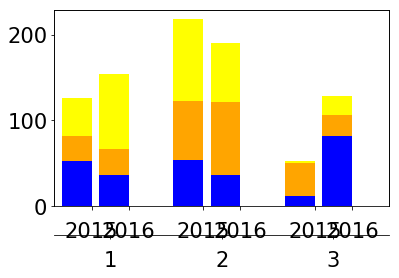

In [301]:
#Plot example with several x axis

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

# Add some extra space for the second axis at the bottom
fig.subplots_adjust(bottom=0.2)
ax1.set_xticks([1,2,4,5,7,8])
ax1.set_xlim(0,9)
ax1.set_xticklabels(('2015','2016','2015','2016','2015','2016'))
ax2.spines["bottom"].set_position(("axes", -0.15))
ax2.xaxis.set_ticks_position("bottom")
ax2.spines["bottom"].set_visible(True)
ax2.set_xticks([1.5,4.5,7.5])
ax2.set_xticklabels(('1','2','3'))
ax2.set_xlim(0,9)

b1 = np.random.randint(0,100,6)
b2 = np.random.randint(0,100,6)
b3 = np.random.randint(0,100,6)
plt.bar(np.array([1,2,4,5,7,8])-0.4,b1,color='blue')
plt.bar(np.array([1,2,4,5,7,8])-0.4,b2,color='orange',bottom=b1)
plt.bar(np.array([1,2,4,5,7,8])-0.4,b3,color='yellow',bottom=b1+b2)

plt.show()